# The conceptual foundations
There are two main NBDA variants: order-of-acquisition diffusion analysis (OADA), which takes as data the order in which individuals acquired the target behaviour, and time-of-acquisition diffusion analysis (TADA), which uses the times of acquisition of the target behaviour. TADA can be further subdivided into versions that treat time as either a continuous variable (continuous TADA or ‘cTADA’) or as a discrete variable split into units (discrete TADA or ‘dTADA’). Choice of OADA versus cTADA versus dTADA depends on the diffusion data available and the assumptions one is willing to make about how the rate of learning changes over time (i.e. the shape of the baseline rate function, λo(t)). 

OADA makes no assumptions about the shape of $λ_o(t)$, but only assumes that this function is the same for every individual in the diffusion. In contrast, TADA requires a researcher to make assumptions about the form of $λ_o(t)$, and fit parameters controlling its shape. When these assumptions are met, TADA offers more statistical power than OADA (Hoppitt, Boogert, et al., 2010), particularly when the network is densely connected with little variation in connection strength. Indeed, when the network is completely homogeneous (i.e. all possible connections exist and are of equal strength), OADA cannot distinguish social transmission from asocial learning since all orders of acquisition would be equally likely in both models. 

In the simplest case, one can fit a TADA that assumes a constant baseline learning rate, $λ_o(t) = λ_o$, with an extra parameter, $λ_o$, fitted to the data (Franz & Nunn, 2009; Hoppitt, Boogert, et al., 2010). However, this assumption may often not hold—for example, individuals might initially exhibit neophobic responses towards a learning task, but as neophobia fades over time, asocial learning rates should increase. Such circumstances can cause a spurious positive result for social transmission in a TADA (Hoppitt, Kandler, Kendal, & Laland, 2010). 

Fortunately, TADA can be modified to have a non-constant baseline rate. Although any positive function can be specified for $λ_o(t)$, the $NBDA$ package has two functions built-in which will be sufficient in most cases. One corresponds to a *gamma* distribution of latencies under asocial learning (Hoppitt, Kandler, et al., 2010), and the other to a *Weibull* distribution of latencies (a common choice in survival analysis; Moore, 2016). Both offer flexible modelling of λo(t) with a shape parameter that allows for the possibility of systematically increasing, decreasing or constant baseline functions.

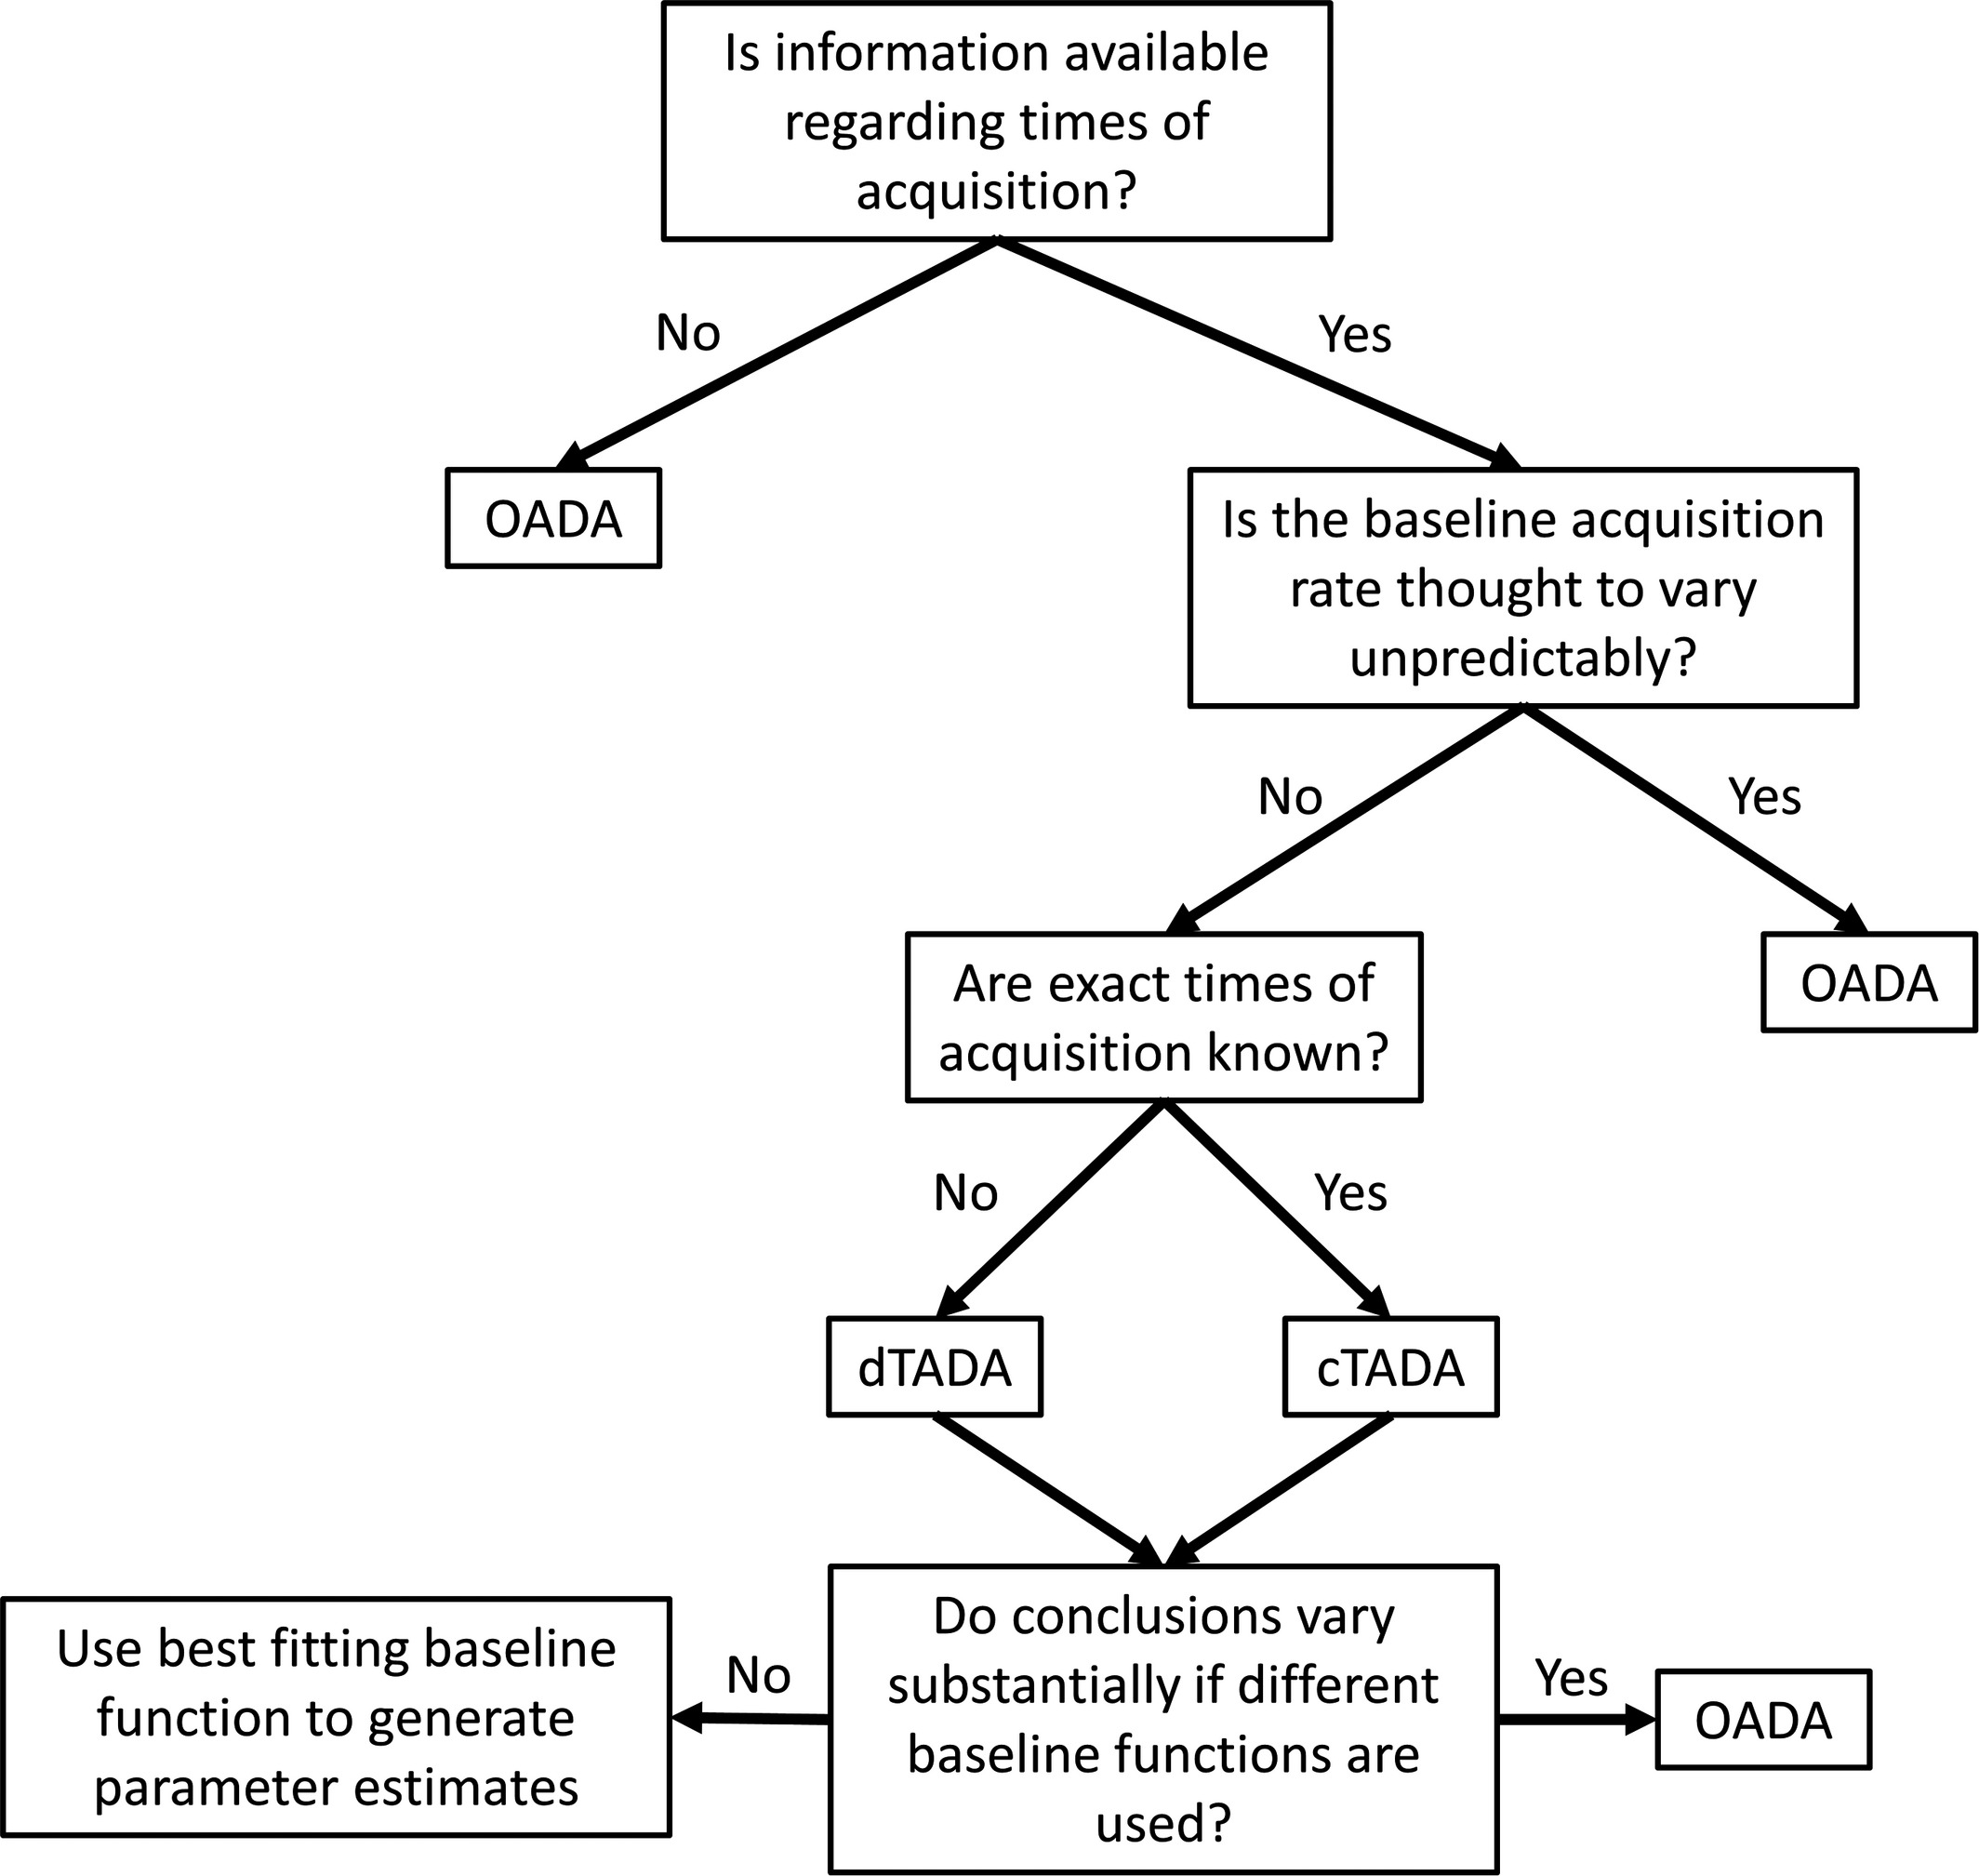

https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/1365-2656.13307


## Basic formulation

### Previous formulation of time of acquisition diffusion analysis
There are two parameters of interest in the basic time of acquisition diffusion analysis model: the rate of social transmission be-tween individuals per unit of network connection,*s*, and the baseline rate of trait performance in the absence of social transmission, $λ_0$ . Throughout this chapter, we refer to the s parameter as the social transmission parameter, and to $λ_0$  as the baseline parameter. The hazard function for the model is expressed as:

$$
\lambda_i(t) = \lambda_0(t) (1- z_i(t)) R_i(t)
$$

such that:

$$
R_i(t) =   \left[ s \sum_{j = 1}^{N} a_{ij} z_j (t) + 1 \right] 
$$

Where:

- $\lambda_i(t)$ is the rate at which individuals *i* acquire the task solution at time *t*.
  
- $\lambda_0(t)$ is a baseline acquisition function determining the distribution of latencies to acquisition in the absence of social transmission (that is, through asocial learning).
  
- $z_i(t)$ gives the status (1 = informed, 0 = naïve) of individual *i* at time *t*.
  
- $(1- z_i(t))$ and $z_j (t)$ terms ensure that the task solution is only transmitted from informed to uninformed individuals:
$$
z_j(t) =  Y_i \sim \begin{cases} 
0, & \text{if j is naive} \\
1, & \text{if j is informed}
\end{cases}
$$

Previous versions of time of acquisition diffusion analysis allow for an increasing or decreasing baseline rate $\lambda_0 (t)$ (Hoppitt, Kandler,et al. 2010). Here, we restrict ourselves to expanding the version for a constant baseline rate (i.e. $\lambda_0(t) = \lambda_0$) (Hoppitt, Boogert, et al. 2010), although the version for a non-constant baseline rate can be expanded in the same way.

## Why do we need Bayesian networkbased diffusion analysis?
- The expansion of network-based diffusion analysis to multiple diffusions could also be valuable where researchers have repeated diffusions
across the same group, or groups, of animals (e.g. Boogert et al. 2008), especially when they only have a limited number of animals, allowing them to obtain good statistical power. However, a statistical problem arises if they fail to account for the fact that the same individuals are involved in multiple diffusions. By including an individual random effect on the asocial rate of learning, the model accounts for the fact that the same individuals have the same (or similar) asocial learning ability in each diffusion. However, random effects can be difficult to implement using maximum likelihood methods (used to fit network-based diffusion analysis models thus far), especially when the random effects structure is complex, because one has to integrate the likelihood function across all the possible values the random effects could take. It is easier to include random effects in a Bayesian model, using Markov chain Monte Carlo methods (Gelman et al. 2004).

- To combine NBDA to Bayesian network models that account more accurately for sampling biases.
  



## Bayesian formulation of time of acquisition diffusion analysis
In principle, the formulation of the model can remain the same for a Bayesian approach as for a model fitted by maximum likelihood. However,
here we wish to include random effects, and reparameterize the model in a way that makes it easier to use in a Bayesian context. Thus, we apply a_ Bayesian time of acquisition diffusion analysis_ to the simulated dataset described in ‘Previous formulation of time of acquisition diffusion analysis’ to assess its performance under different circumstances. To illustrate the importance of both random
effects and social transmission, four models were considered based on their inclusion/exclusion. Two of the models (Models 1 and 2) do not include random effects, while Models 3 and 4 do. Likewise two f the models (Models 1 and 3) do not include an *s* parameter, while Models 2 and 4 do. Please see Table 5.1 for details.

The linear predictors are easily adapted to include random effects. For Models 3 and 4 for example, random effects ε at the individual level
were considered such that ε = {ε1, . . . , ε10} and the total number of individuals is ten. The term Ri(t) in Equation 2 is therefore expanded to:


$$
R_i(t) =   \left[ s \sum_{j = 1}^{N} a_{ij} z_j (t) + \exp(\epsilon_k) \right] 
$$

where:
- $k \in {1,...,5}$ and and depends on which task is involved. The rate of trait performance $\lambda_i (t)$ for individual *i*, at time *t* therefore becomes:

$$
\lambda_i(t) = \lambda_0(t) (1-z_i(t))  \left[ s \sum_{j = 1}^{N} a_{ij} z_j (t) + \exp(\epsilon_k) \right] 
$$

To allow us to more easily set a prior distribution reflecting our state of knowledge (see below), Equation 7 is then re-parameterized to obtain :

$$
\lambda_i(t) = (1-z_i(t))  \left[\lambda_0 s \sum_{j = 1}^{N} a_{ij} z_j (t) + \lambda_0\exp(\epsilon_k) \right] 
$$

giving:

$$
\lambda_i(t) = (1-z_i(t))  \left[s' \sum_{j = 1}^{N} a_{ij} z_j (t) + \lambda_0\exp(\epsilon_k) \right]
$$

where:
- $s' = \lambda_0s$

The effect of social interactions on the rate of learning $s'$ and the baseline rate of learning $\lambda_0$ are the two parameters of interest. We refer to the re-parameterized $s′$ as the unscaled social transmission parameter, since it is not scaled such that it is quantified relative to the rate of asocial learning, as $s$ is. The social effect parameter $s'$ may be interpreted as the median effect of the social interactions on the overall hazard rate. For instance, where social transmission underlies the diffusion, $s'$ is a measure of its strength. The baseline rate parameter expresses the hazard
of an individual in an asocial environment (for instance, the rate of asocial learning). This parameter is frequently termed a ‘nuisance’ parameter because the parameter of interest in the NBDA analyses is predominantly $s'$.The full parameter vector θ is defined as $0 = \{ s', \lambda_0, \epsilon, \sigma_{\epsilon}^{2}\} $, where ε refers to random effects at the task level. The variance term $\sigma_{\epsilon}^{2}$ denotes the variance for the distribution of the task level random effects.



(17) (PDF) Quantifying diffusion in social networks: a Bayesian approach. Available from: https://www.researchgate.net/publication/270048687_Quantifying_diffusion_in_social_networks_a_Bayesian_approach [accessed Oct 24 2024].

# Simulation

## Functions

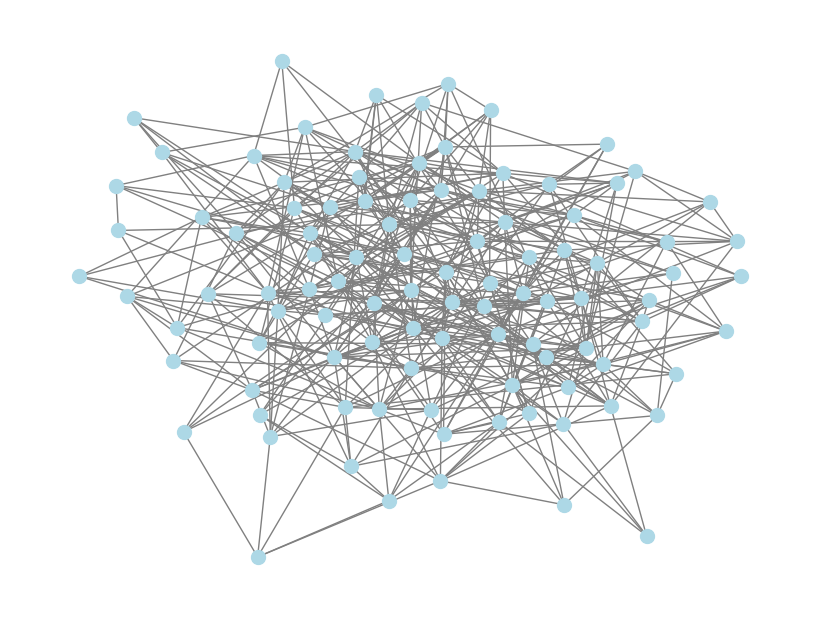

In [137]:
import networkx as nx
import matplotlib.pyplot as plt
# Generating random network (In the future we will use STRAND network generations to include data collection biases)
def create_random_network(n, rate = 0.2, seed=0):
    """
    Create a random network adjacency matrix using the Erdős-Rényi model.
    
    Parameters:
        n (int): Number of nodes in the network.
        rate (float): ate parameter (mean of the distribution), must be >= 0.
        seed (int): Random seed for reproducibility.
        
    Returns:
        jax.numpy.ndarray: Adjacency matrix of the generated random network.
    """
    # Set the random seed for reproducibility
    key = jax.random.PRNGKey(seed)
    
    upper_tri = jax.random.poisson(key,lam = rate,  shape = (n, n))
    lower_tri = upper_tri
    
    # Make the matrix symmetric to represent an undirected graph
    m = upper_tri + lower_tri
    m = m.at[jnp.diag_indices(m.shape[0])].set(0)
    return m

def plot_network(m):
    """
    Plot the network adjacency matrix.
    
    Parameters:
    m (jnp.array): An array of agents' social contact matrix.
    
    Returns:
    None.
    """
    G = nx.from_numpy_array(m)
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Compute positions for visualization
    nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=100)
    plt.show()

def simulate_social_transmission(m, s=5, baseRate=1/100, BNoise=0.1, seed=0):
    """Simulate a social transmission process in a network.

    Args:
        m (2d array): network adjacency matrix
        s (int, optional): social transmission coefficient. Defaults to 5.
        baseRate (float, optional): base rate of transmission. Defaults to 1/100.
        BNoise (float, optional): variance of s. Defaults to 0.1.
        seed (int, optional): seed for reproducibility. Defaults to 0.

    Returns:
        tuple: Two arrays, time of acquisition and order of acquisition.
    """

    key = jax.random.PRNGKey(seed)
    N = m.shape[0]

    # Initialize the asocial learning propensity for all nodes to 1
    asocialLP = jnp.ones(N)

    # Create a vector of social transmission coefficients with noise, sampled from a normal distribution
    BVect = jnp.exp(bi.dist.normal(jnp.log(2), BNoise, shape=(N,), sample=True, seed=seed))

    # Initialize arrays to store acquisition status, acquisition order, and acquisition time for each individual
    z = orderAcq = timeAcq = jnp.zeros(N)

    # Initialize the running time counter
    runningTime = 0

    # Iterate over each individual to simulate their acquisition process
    for i in range(N):
        
        # Calculate the transmission rate for each individual based on the base rate, social influence, and current acquisition status
        rate = baseRate * (jnp.exp(asocialLP) + s * z @ (m.T * BVect).T) * (1 - z)

        # Sample times to the next transmission event from an exponential distribution for each individual
        times = bi.dist.exponential(rate, sample=True, seed=seed)

        # Find the individual with the minimum time, indicating the next transmission event
        min = jnp.argmin(times)

        # Update the acquisition order for this transmission event
        orderAcq = orderAcq.at[i].set(min)

        # Increment the running time with the minimum time to reflect the cumulative time of the process
        runningTime = runningTime + min

        # Record the cumulative time of acquisition for this individual
        timeAcq = timeAcq.at[i].set(runningTime)

        # Update the acquisition status of the individual who acquired the trait
        z = z.at[min].set(1)

    # Return the acquisition times and order for all individuals
    return timeAcq, orderAcq

# Create a random network adjacency matrix with 100 nodes and a connection rate of 0.2
m = create_random_network(100, rate=0.05)
plot_network(m)

## Asocial transmission

In [138]:
AstimeAcq, AsorderAcq = simulate_social_transmission(m, s=0, BNoise=0.1, seed=10)

## Social transmission

In [139]:
StimeAcq, SorderAcq = simulate_social_transmission(m, s=5, BNoise=0.1, seed=0)

### Applying the NBDA algorithm to the simulated data problem


- This example involves 3 individuals and 1 tasks. It is the equivalent of $a_ij$ in the equation above.

In [668]:
from main import *
m = jnp.array([
    [0,1,2],
    [3,0,4],
    [5,6,0]
])
m 

Array([[0, 1, 2],
       [3, 0, 4],
       [5, 6, 0]], dtype=int32)

- The solve orders of diffusion should be stored in a 1d array each element represents the solve index as shown below. In the array below *SolveOrders*, the first individual that solved the first task is individual 1, the last individual to solve the taskis individual 2. It is the equivalent of $z_j(t)$ in the equation above.

In [74]:
SolveOrders = jnp.array([1,3,2])
def get_status_by_t(SolveOrders): 
    times = len(SolveOrders)
    N_id = len(SolveOrders)
    z_i = jnp.zeros((N_id, times))
    for i in range(times):
        z_i = z_i.at[SolveOrders[:i+1] - 1, i].set(1)
    return z_i
z_i = get_status_by_t(SolveOrders)
z_i

Array([[1., 1., 1.],
       [0., 0., 1.],
       [0., 1., 1.]], dtype=float64)

- Based on descriptions, lambda is a parameter drawn from a $gamma$ distribution with parameters alpha and beta. But it could also be drawn from a $Weibull$ distribution. We can thus now compute $\lambda_0(t) (1-z_i(t))$

In [62]:
times = len(SolveOrders)
lambda_0 = bi.dist.gamma(concentration = 0.5, rate = 1.0, name='alpha', sample = True, shape = (1,))
asocial_rate =   lambda_0 * (1- z_i)
asocial_rate

Array([[0.        , 0.        , 0.        ],
       [2.72272551, 2.72272551, 0.        ],
       [2.72272551, 0.        , 0.        ]], dtype=float64)

- To get $\sum_{j = 1}^{N} a_{ij} z_j (t) + 1$ we:
  - Invert z_i to get z_j. 
  - Row sums of m rows multiplied element-wise by each column of z_j 

In [58]:
def multiply_by_column(m, z_col):
    tmp =  m * z_col[:, None] +1 
    return jnp.sum(tmp, axis=0)

sum_aij_x_z_j_1 = vmap(multiply_by_column, in_axes=(None, 1))(m, z_j)
sum_aij_x_z_j_1


Array([[11.,  9.,  7.],
       [ 6.,  3.,  7.],
       [ 3.,  3.,  3.]], dtype=float64)

- Based on description, *s* is a parameter drawn from a normal distribution, it is the equivalent of regression coefficients in linear regression. We compute : $s \sum_{j = 1}^{N} a_{ij} z_j (t) + 1$ at each time setp

In [59]:
s = bi.dist.normal(0, 1, shape = (1,), sample=True)
soc_rate = sum_aij_x_z_j_1 * s
soc_rate

Array([[-8.63242354, -7.06289199, -5.49336044],
       [-4.70859466, -2.35429733, -5.49336044],
       [-2.35429733, -2.35429733, -2.35429733]], dtype=float64)

- Finally we can get the full formula : $\lambda_0(t) (1-z_i(t)) (s \sum_{j = 1}^{N} a_{ij} z_j (t) + 1)$ ans sample it with a *Poisson distribution* but with which output as observed values? z_i?

In [64]:
lambdas = asocial_rate * soc_rate
lambdas

Array([[ -0.        ,  -0.        ,  -0.        ],
       [-12.82021079,  -6.41010539,  -0.        ],
       [ -6.41010539,  -0.        ,  -0.        ]], dtype=float64)

In [67]:
lk('OADA', Poisson(jnp.exp(lambdas)), obs=z_i)


Array([[1., 1., 1.],
       [0., 0., 1.],
       [0., 1., 1.]], dtype=float64)

- Full model

In [109]:

from main import *
m = bi()
# Giving inputs:
## Network of interactions:
network = jnp.array([
    [0,1,2],
    [3,0,4],
    [5,6,0]
])

## Order of acquisition:
Orders = jnp.array([1,3,2])

# Get status for each times point:
z_i = get_status_by_t(SolveOrders)

# NBDA model
def model(network, z_i, Orders):
    times = z_i.shape[1]

    # asocial rate--------------------------------------
    lambda_0 = bi.dist.gamma(concentration = 0.5, rate = 1.0, name='asocial rate', shape = (1,))
    asocial_rate =   lambda_0 * (1- z_i)
    asocial_rate

    # social rate----------------------------------------
    s = bi.dist.normal(0, 1, shape = (1,), name='social rate')    
    z_j = 1 - z_i
    sum_aij_x_z_j_1 = vmap(multiply_by_column, in_axes=(None, 1))(network, z_j)
    soc_rate = sum_aij_x_z_j_1 * s

    NBDA = jnp.sum(asocial_rate * soc_rate, axis = 1)

    lk('OADA', Poisson(jnp.exp(NBDA)), obs = Orders)



m.data_on_model = dict(
    network = network,
    z_i = z_i,
    Orders = Orders
)

m.run(model, num_samples = 500, num_warmup = 500, num_chains = 1, thinning = 1, progress_bar = True)
m.summary()


jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 496.22it/s, 7 steps of size 1.88e-01. acc. prob=0.78]


,mean,sd,hdi_5.5%,hdi_94.5%
asocial rate[0],0.22,0.26,0.00,0.51
social rate[0],0.52,0.67,-0.29,1.60
